In [1]:
!pip install mat73

  Using cached h5py-3.10.0-cp39-cp39-win_amd64.whl.metadata (2.5 kB)
Using cached h5py-3.10.0-cp39-cp39-win_amd64.whl (2.7 MB)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.io
import mat73
#from sklearn.preprocessing import MinMaxScaler
from scipy.interpolate import interp1d

In [4]:
dff_raw = scipy.io.loadmat('dff raw trial1.mat')
kinematics_raw = scipy.io.loadmat('kinematics raw trial1.mat')
preprocessed_vars_ds = scipy.io.loadmat('preprocessed_vars_ds trial1.mat')
preprocessed_vars_odor = scipy.io.loadmat('preprocessed_vars_odor trial1.mat')
#dff_raw = scipy.io.loadmat('dff raw trial3.mat')
#kinematics_raw = scipy.io.loadmat('kinematics raw trial3.mat')
#preprocessed_vars_ds = scipy.io.loadmat('preprocessed_vars_ds trial3.mat')
#posfunc_x = scipy.io.loadmat('position_function_005_X.mat')
#posfunc_y =  scipy.io.loadmat('position_function_006_Y.mat')

In [5]:
display_rate = 50
dff_time = dff_raw['roiTime']
dff_rois = dff_raw['flDataC']
len(dff_rois)
#time_pos = np.arange(len(np.squeeze(posfunc_x['func'])))/display_rate

1

In [6]:
dff_rois

array([[array([[ 0.12094079],
               [ 0.02443049],
               [-0.12016384],
               ...,
               [ 0.15362886],
               [ 0.20650156],
               [ 0.25832355]]), array([[-0.0155787 ],
                                       [ 0.05855003],
                                       [ 0.11782363],
                                       ...,
                                       [ 0.14673863],
                                       [ 0.16301783],
                                       [ 0.13363578]]),
        array([[0.06899748],
               [0.03515909],
               [0.02755204],
               ...,
               [0.2996289 ],
               [0.22921707],
               [0.20668715]]), array([[0.17808563],
                                      [0.19100874],
                                      [0.20007533],
                                      ...,
                                      [0.41222156],
                                      [0.332

In [7]:
dff_time = dff_raw['roiTime']
dff_rois = dff_raw['flDataC']
fl_df = pd.DataFrame()
fl_df['time'] = np.squeeze(dff_time)
#fl_df['posx'] = f_x(np.squeeze(dff_time))
#fl_df['posy'] = f_y(np.squeeze(dff_time))
#fl_df['CRE_L'] = dff_rois[0][0]
#fl_df['CRE_R'] = dff_rois[0][1]
fl_df['hDeltaB1'] = dff_rois[:,0][0]
fl_df['hDeltaB2'] = dff_rois[:,1][0]
fl_df['hDeltaB3'] = dff_rois[:,12][0]
for i in range(7):
    fl_df['hDeltaB'+str(i+4)] = dff_rois[:,i+20][0]
for i in range(10):
    fl_df['hDeltaB'+str(i+11)] = dff_rois[:,i+2][0]
for i in range(7):
    fl_df['hDeltaB'+str(i+21)] = dff_rois[:,i+13][0]

In [8]:
odor_all = preprocessed_vars_odor['odorDown']

In [9]:
odor_all

array([[-0.00000000e+00, -6.68216767e-03, -3.54301875e-03, ...,
         9.75303905e+00,  9.74012476e+00,  9.74695685e+00]])

In [10]:
fl_df['fwV'] = np.squeeze(preprocessed_vars_ds['ftT_fwSpeedDown2'])
fl_df['sideV'] = np.squeeze(preprocessed_vars_ds['ftT_sideSpeedDown2'])
fl_df['yawV'] = np.squeeze(preprocessed_vars_ds['ftT_yawSpeedDown2'])
fl_df['heading'] = np.squeeze(preprocessed_vars_ds['ftT_intHDDown2'])
fl_df['abssideV'] = np.abs(np.squeeze(preprocessed_vars_ds['ftT_sideSpeedDown2']))
fl_df['absyawV'] = np.abs(np.squeeze(preprocessed_vars_ds['ftT_yawSpeedDown2']))
#fl_df['mean_MBON09'] = (fl_df['MBON09L']+fl_df['MBON09R'])/2
fl_df['net_motion'] = fl_df['abssideV']+fl_df['absyawV']+np.abs(fl_df['fwV'])
fl_df['net_motion_state'] = (fl_df['net_motion']>2.5).astype(int)
fl_df['heading_adj'] = np.unwrap(fl_df['heading'])
fl_df['odor'] = np.squeeze(odor_all)

(array([125., 151., 135., 122., 121., 136., 112., 125., 136., 123., 118.,
        124., 120., 127., 128., 140., 120., 143., 136., 132., 119., 107.,
        115., 110., 119.,  95.,  61.,  69.,  56.,  31.,  32.,  21.,  15.,
         17.,   4.,   5.,   3.,   0.,   0.,   1.]),
 array([ 0.        ,  0.63230136,  1.26460273,  1.89690409,  2.52920545,
         3.16150682,  3.79380818,  4.42610954,  5.05841091,  5.69071227,
         6.32301363,  6.95531499,  7.58761636,  8.21991772,  8.85221908,
         9.48452045, 10.11682181, 10.74912317, 11.38142454, 12.0137259 ,
        12.64602726, 13.27832863, 13.91062999, 14.54293135, 15.17523272,
        15.80753408, 16.43983544, 17.07213681, 17.70443817, 18.33673953,
        18.9690409 , 19.60134226, 20.23364362, 20.86594498, 21.49824635,
        22.13054771, 22.76284907, 23.39515044, 24.0274518 , 24.65975316,
        25.29205453]),
 <BarContainer object of 40 artists>)

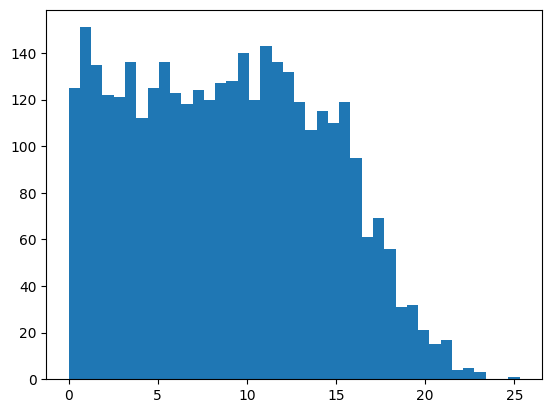

In [11]:
plt.hist(fl_df['net_motion'],bins=40)

In [12]:
fl_df

time  hDeltaB1  hDeltaB2  hDeltaB3  hDeltaB4  hDeltaB5  hDeltaB6  \
0       0.000000  0.120941 -0.015579  0.024259  0.025294 -0.073120 -0.098666   
1       0.171684  0.024430  0.058550 -0.002409  0.034700 -0.094542 -0.116711   
2       0.343367 -0.120164  0.117824  0.043765  0.056346 -0.137873 -0.121473   
3       0.515051 -0.207342  0.117534  0.152256  0.088161 -0.116555 -0.079866   
4       0.686734 -0.156834  0.085705  0.170889  0.066314 -0.053314 -0.021688   
...          ...       ...       ...       ...       ...       ...       ...   
3549  609.304905  0.299384  0.219595  0.229648  0.147286  0.197321  0.075861   
3550  609.476588  0.189099  0.151500  0.210810  0.159072  0.149227  0.107545   
3551  609.648272  0.153629  0.146739  0.143984  0.176096  0.128196  0.125074   
3552  609.819955  0.206502  0.163018  0.137663  0.132580  0.173372  0.113197   
3553  609.991639  0.258324  0.133636  0.122576  0.019813  0.217376  0.083256   

      hDeltaB7  hDeltaB8  hDeltaB9  ...       fwV     sideV      yawV  \
0     0.069836 -0.229273 -0.120880  ...  0.000000  0.000000  0.000000   
1     0.072951 -0.114038 -0.096511  ...  5.994784  0.876614  0.805309   
2     0.065103 -0.001189 -0.043350  ...  3.328190 -0.091781  1.458516   
3     0.077096  0.057527 -0.001724  ... -0.141281 -0.329481 -1.162572   
4     0.117241  0.042863 -0.007837  ... -2.312621 -2.717068 -2.028379   
...        ...       ...       ...  ...       ...       ...       ...   
3549  0.055487  0.133786  0.160176  ...  3.747693  5.151543  1.667233   
3550  0.064901  0.142766  0.155309  ...  6.852808  0.745411  0.374694   
3551  0.063911  0.155056  0.170933  ...  4.054921 -4.049440 -0.620627   
3552  0.047625  0.083378  0.157292  ...  6.946215 -2.939878 -2.354405   
3553  0.022487 -0.006220  0.122083  ...  1.561718 -0.605914 -0.331795   

       heading  abssideV   absyawV  net_motion  net_motion_state  heading_adj  \
0     1.751456  0.000000  0.000000    0.000000                 0     1.751456   
1     1.910944  0.876614  0.805309    7.676707                 1     1.910944   
2     2.149969  0.091781  1.458516    4.878488                 1     2.149969   
3     2.120900  0.329481  1.162572    1.633334                 0     2.120900   
4     1.802799  2.717068  2.028379    7.058068                 1     1.802799   
...        ...       ...       ...         ...               ...          ...   
3549  2.845566  5.151543  1.667233   10.566469                 1   -97.685399   
3550  3.044723  0.745411  0.374694    7.972912                 1   -97.486242   
3551  3.015625  4.049440  0.620627    8.724988                 1   -97.515340   
3552  2.678613  2.939878  2.354405   12.240498                 1   -97.852351   
3553  2.438145  0.605914  0.331795    2.499427                 0   -98.092819   

          odor  
0    -0.000000  
1    -0.006682  
2    -0.003543  
3    -0.003918  
4    -0.005372  
...        ...  
3549  9.760901  
3550  9.759948  
3551  9.753039  
3552  9.740125  
3553  9.746957  

[3554 rows x 38 columns]

In [13]:
len(fl_df)

3554

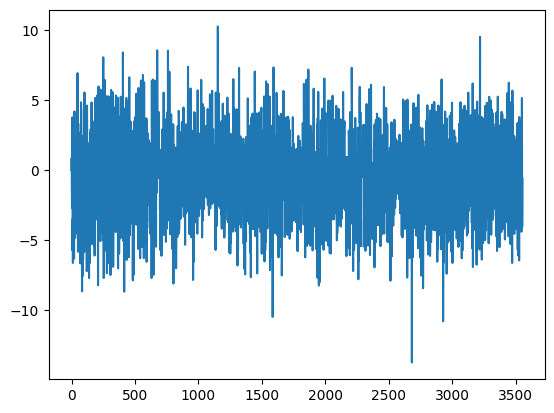

In [14]:
plt.plot(fl_df.sideV)

In [15]:
# reconstruct path
ball_d = 9 #diameter of ball, in mm
circum = ball_d * np.pi #circumference of ball, in mm
mmPerDeg = circum / 360 # mm per degree of ball
fwdAngVel = fl_df.fwV/mmPerDeg 
# zero heading
zeroedH = fl_df.heading - fl_df.heading[0]
time_bin = np.diff(fl_df.time)
# movement in x (in degrees) at each time point
xChangePos = (fwdAngVel[0:-1]*time_bin)*np.sin(zeroedH[0:-1]) + (fl_df.sideV[0:-1]*time_bin)*np.sin(zeroedH[0:-1]+np.pi/4)
xPos = (np.cumsum(xChangePos) - xChangePos[0])*mmPerDeg
yChangePos = (fwdAngVel[0:-1]*time_bin)*np.cos(zeroedH[0:-1]) + (fl_df.sideV[0:-1]*time_bin)*np.cos(zeroedH[0:-1]+np.pi/4)
yPos = (np.cumsum(yChangePos) - yChangePos[0])*mmPerDeg

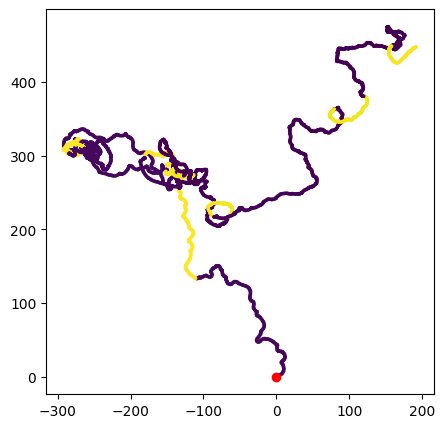

In [16]:
# reconstructed path colored by bump amplitude
fig,ax = plt.subplots(figsize = (5,5))
ax.scatter(xPos,yPos,c= fl_df.odor[1:], s=3)
#ax.scatter(odor_pd.x,odor_pd.y,c= odor_pd.odor,s=3)
ax.scatter(0,0,color = 'red')
#plt.colorbar(fig)
# bump amplitude increases as the fly breaks off from 

In [17]:
len(fl_df)

3554

In [18]:
fl_df.iloc[:,1:28]

hDeltaB1  hDeltaB2  hDeltaB3  hDeltaB4  hDeltaB5  hDeltaB6  hDeltaB7  \
0     0.120941 -0.015579  0.024259  0.025294 -0.073120 -0.098666  0.069836   
1     0.024430  0.058550 -0.002409  0.034700 -0.094542 -0.116711  0.072951   
2    -0.120164  0.117824  0.043765  0.056346 -0.137873 -0.121473  0.065103   
3    -0.207342  0.117534  0.152256  0.088161 -0.116555 -0.079866  0.077096   
4    -0.156834  0.085705  0.170889  0.066314 -0.053314 -0.021688  0.117241   
...        ...       ...       ...       ...       ...       ...       ...   
3549  0.299384  0.219595  0.229648  0.147286  0.197321  0.075861  0.055487   
3550  0.189099  0.151500  0.210810  0.159072  0.149227  0.107545  0.064901   
3551  0.153629  0.146739  0.143984  0.176096  0.128196  0.125074  0.063911   
3552  0.206502  0.163018  0.137663  0.132580  0.173372  0.113197  0.047625   
3553  0.258324  0.133636  0.122576  0.019813  0.217376  0.083256  0.022487   

      hDeltaB8  hDeltaB9  hDeltaB10  ...  hDeltaB18  hDeltaB19  hDeltaB20  \
0    -0.229273 -0.120880   0.133626  ...   0.224973   0.117983   0.035856   
1    -0.114038 -0.096511   0.165598  ...   0.226983   0.094362  -0.040114   
2    -0.001189 -0.043350   0.174913  ...   0.241533   0.102702  -0.053874   
3     0.057527 -0.001724   0.111320  ...   0.247535   0.158649  -0.001923   
4     0.042863 -0.007837   0.066020  ...   0.227619   0.178939   0.043287   
...        ...       ...        ...  ...        ...        ...        ...   
3549  0.133786  0.160176   0.256177  ...   0.438771   0.444116   0.337849   
3550  0.142766  0.155309   0.260334  ...   0.456776   0.395560   0.378137   
3551  0.155056  0.170933   0.195818  ...   0.469919   0.339803   0.402883   
3552  0.083378  0.157292   0.175033  ...   0.471220   0.347820   0.370111   
3553 -0.006220  0.122083   0.214840  ...   0.488623   0.375989   0.319687   

      hDeltaB21  hDeltaB22  hDeltaB23  hDeltaB24  hDeltaB25  hDeltaB26  \
0     -0.059405   0.005762  -0.083947  -0.116292  -0.007838   0.200136   
1     -0.035405  -0.024805  -0.095816  -0.128843   0.029019   0.181912   
2     -0.002053  -0.048078  -0.081334  -0.094361   0.079765   0.210308   
3      0.025755  -0.034742  -0.036108  -0.018751   0.101192   0.265153   
4      0.045997  -0.029222  -0.033925   0.027570   0.061499   0.275215   
...         ...        ...        ...        ...        ...        ...   
3549   0.258039   0.320124   0.217587   0.154266   0.222569   0.208403   
3550   0.279545   0.332755   0.246045   0.132332   0.176111   0.239903   
3551   0.295405   0.390441   0.293319   0.173733   0.209161   0.223809   
3552   0.278224   0.401230   0.268145   0.205523   0.261350   0.195697   
3553   0.257112   0.388837   0.228108   0.194561   0.319141   0.156687   

      hDeltaB27  
0      0.065967  
1      0.177473  
2      0.454714  
3      0.748812  
4      0.707746  
...         ...  
3549   0.241724  
3550   0.257574  
3551   0.235760  
3552   0.201817  
3553   0.214562  

[3554 rows x 27 columns]

<Axes: >

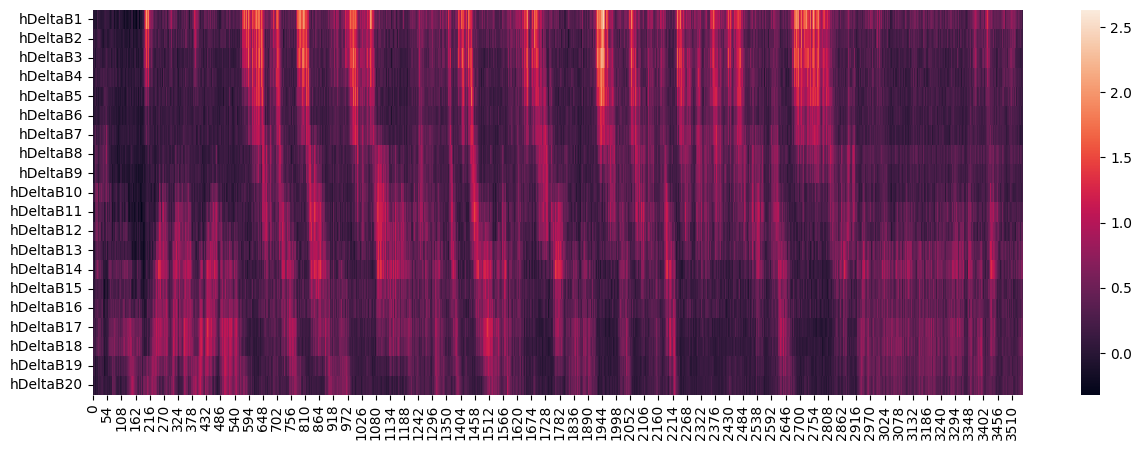

In [21]:
import seaborn as sns
fig, axes = plt.subplots(figsize=(15,5))
sns.heatmap(np.transpose(fl_df.iloc[:,1:21]))

<Axes: >

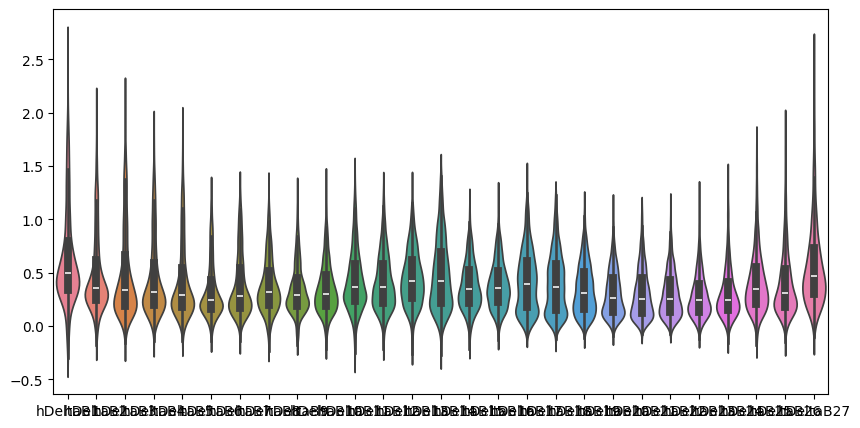

In [22]:
fig, axes = plt.subplots(figsize=(10,5))
sns.violinplot(data = fl_df.iloc[:,1:28])

<Axes: >

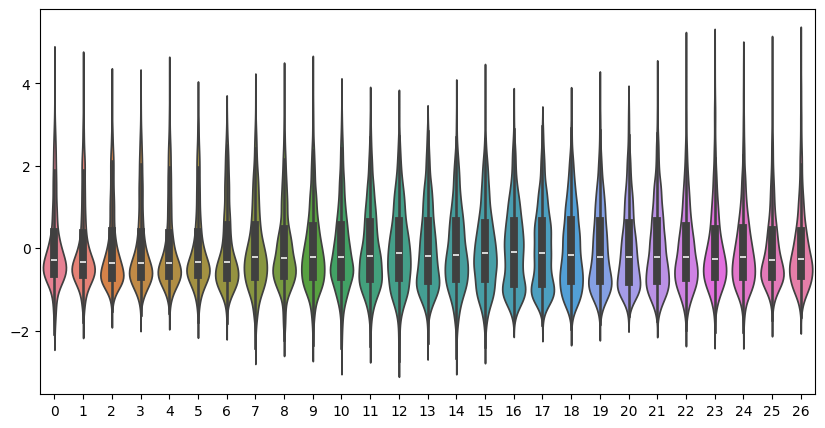

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_fl_tr = scaler.fit_transform(fl_df.iloc[:,1:28])
fig, axes = plt.subplots(figsize=(10,5))
sns.violinplot(data = df_fl_tr)

<Axes: >

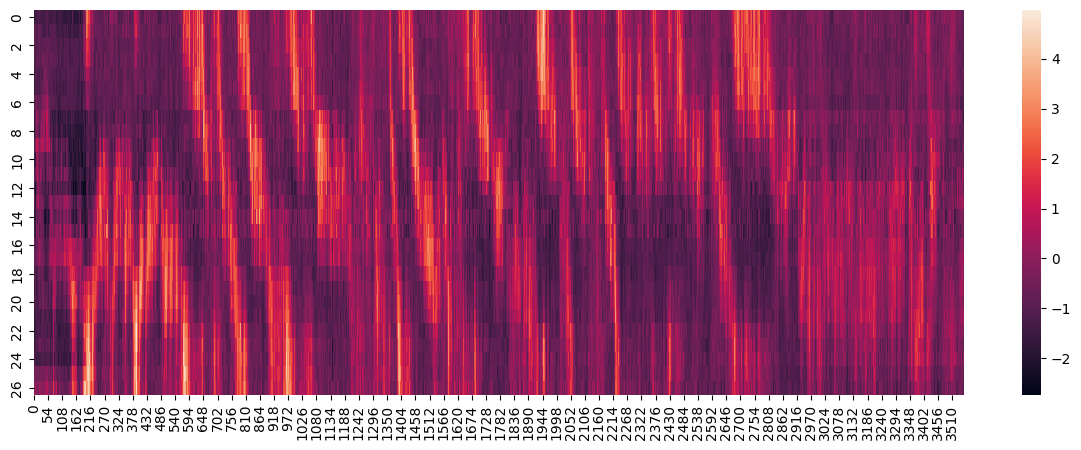

In [29]:
fig,ax = plt.subplots(figsize=(15,5))
sns.heatmap(np.transpose(df_fl_tr))

In [30]:
np.shape(df_fl_tr)[1]

27

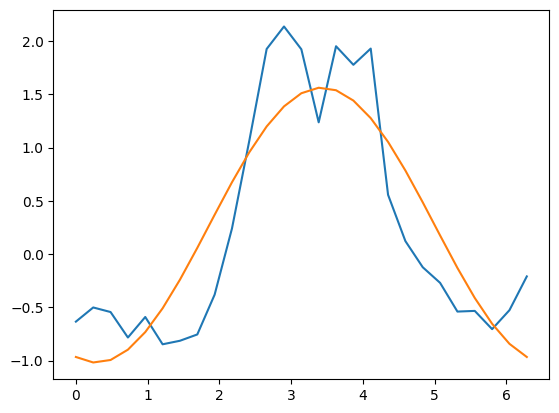

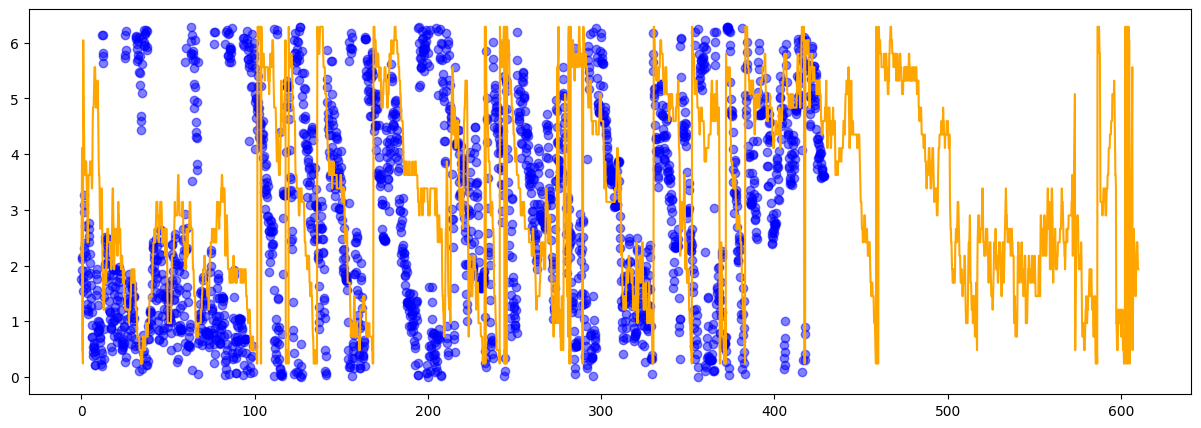

In [31]:
x_p = np.linspace(0, 2*np.pi, num=27)
from scipy import optimize
#from IPython.display import display, Math

def test_func(x, dist, amp, phi):
    return dist + amp * np.cos(x + phi)
params, params_covariance = optimize.curve_fit(test_func, x_p, df_fl_tr[320,0:27],maxfev = 5000)
dist = params[0]
amp = params[1]
#omega = params[2]
phi = params[2]

plt.plot(x_p,df_fl_tr[320,0:27])
plt.plot(x_p,test_func(x_p, dist, amp, phi))
np.abs(amp)
#plt.plot(x_p,dist + amp * np.cos(x_p))

x_p[np.argmax(test_func(x_p, dist, amp, phi))]

trial_len = len(fl_df)
phase_sinfit = np.zeros(trial_len)
base_sinfit = np.zeros(trial_len)
amp_sinfit = np.zeros(trial_len)
for i in range(trial_len):
    params, params_covariance = optimize.curve_fit(test_func, x_p, df_fl_tr[i,0:27],maxfev = 5000)
    phase_sinfit[i] = x_p[np.argmax(test_func(x_p, params[0], params[1], params[2]))]
    amp_sinfit[i] = np.abs(params[1])
    base_sinfit[i] = params[0]

# largest fluorescence = peak
trial_len = len(fl_df)
phase = np.zeros(trial_len)
bins = np.linspace(0, 2*np.pi, num=27)
for i in range(trial_len):
    phase_bin = np.argmax(df_fl_tr[i, 0:27])
    phase[i] = bins[26-phase_bin]

fig, ax = plt.subplots(figsize=[15,5])
ind1 = 0
ind2 = 2497
#heading_df = np.diff(np.squeeze(heading_tf))
ax.scatter(fl_df.time[ind1:ind2], fl_df.heading[ind1:ind2],color='blue', alpha = 0.5)
#ax.plot(fl_df.time, loc+np.pi, color = 'orange') # fit Von Mises 
#ax.plot(fl_df.time,phase, color = 'red') # find the phase with the highest activity
ax.plot(fl_df.time,2*np.pi-phase_sinfit, color = 'orange')

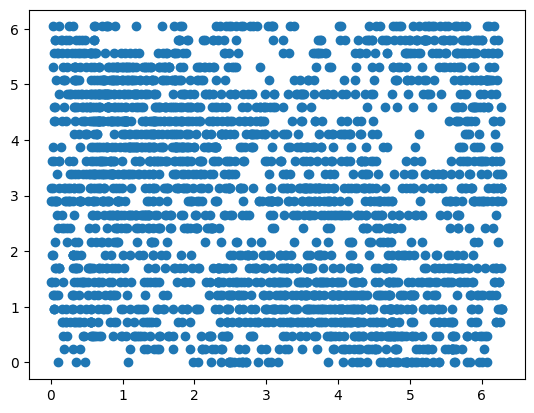

In [32]:
plt.scatter(fl_df.heading[ind1:ind2],phase_sinfit[ind1:ind2])

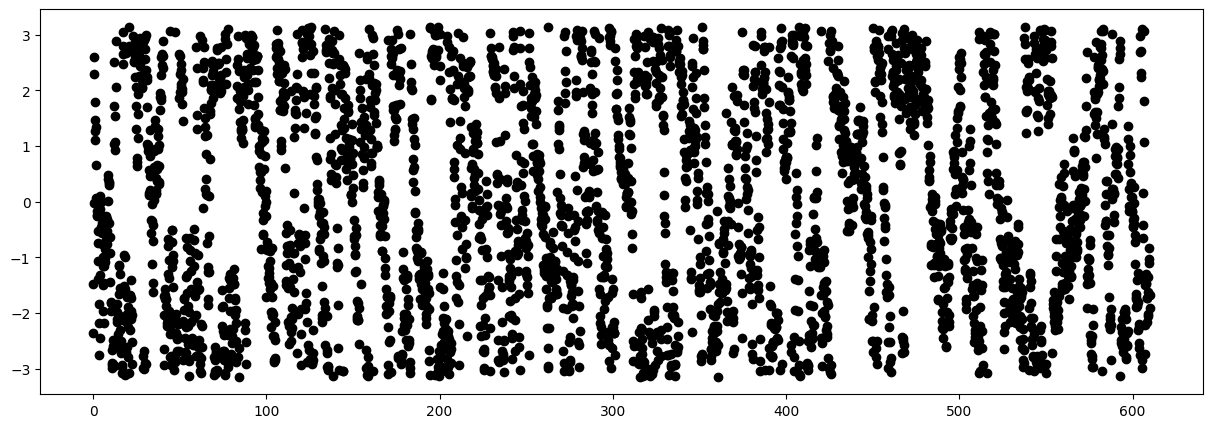

In [33]:
# bump phase vs heading difference
fig, ax = plt.subplots(figsize=[15,5])
ind1 = 0
ind2 = len(fl_df)
#ax.scatter(fl_df.time[ind1:ind2], np.unwrap(fl_df.heading[ind1:ind2]),color='blue', alpha = 0.5)
#ax.plot(fl_df.time,phase, color = 'red') # find the phase with the highest activity
#ax.plot(fl_df.time[ind1:ind2],np.unwrap(phase_sinfit[ind1:ind2]), color = 'orange')
phase_dif = np.angle(np.exp(1j*fl_df.heading[ind1:ind2])/np.exp(1j*(phase_sinfit[ind1:ind2]))) 
ax.scatter(fl_df.time[ind1:ind2],phase_dif, color = 'black')
#np.angle(np.exp(1i*x)./np.exp(1i*y))

Text(0, 0.5, 'forward velocity (mm/s)')

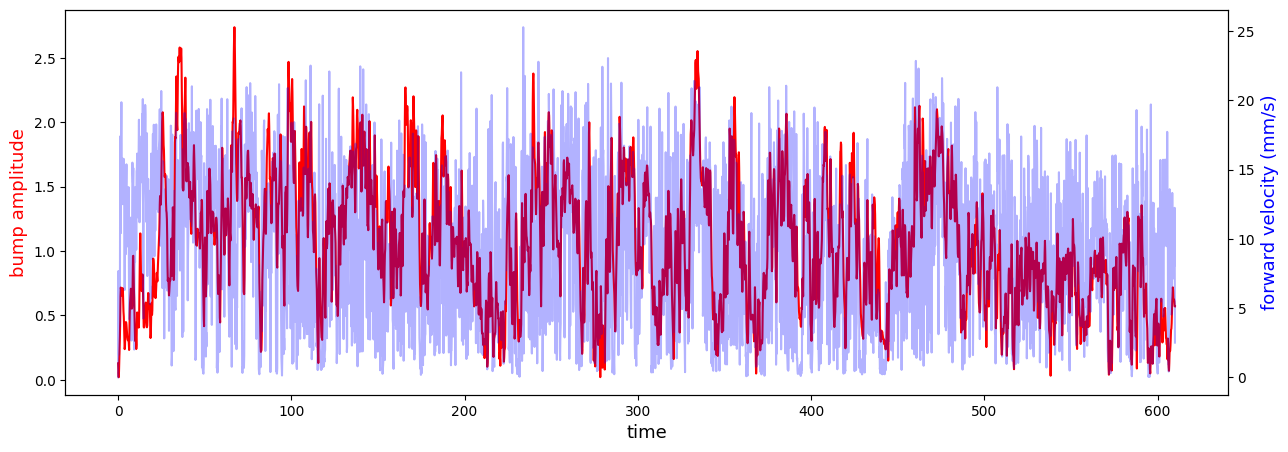

In [34]:
fig, ax = plt.subplots(figsize=[15,5])
ind1 = 0
ind2 = len(fl_df)
#heading_df = np.diff(np.squeeze(heading_tf))
ax.plot(fl_df.time[ind1:ind2], amp_sinfit[ind1:ind2],color = 'red')
#ax.plot(fl_df.time[ind1:ind2], fl_df.hDeltaB1[ind1:ind2],color='red')
#ax.plot(fl_df.time[ind1:ind2], fl_df.hDeltaB3[ind1:ind2],color='orange')
#ax.plot(fl_df.time[ind1:ind2], fl_df.MBON30R[ind1:ind2],color='orange')
ax2 = ax.twinx()
#ax.plot(fl_df.time[ind1:ind2], PAM12_soma1_tf[ind1:ind2],color='orange')
#ax.plot(fl_df.time[ind1:ind2], PAM12_soma2_tf[ind1:ind2],color='salmon')
#ax.plot(fl_df.time[ind1:ind2], PAM12_soma3_tf[ind1:ind2],color='gold')
#ax2 = ax1.twinx()
#ax.plot(fl_df.time[ind1:ind2], yawV_tf[ind1:ind2],color='gold')
#ax.plot(fl_df.time[ind1:ind2], sideV_tf[ind1:ind2],color='orange')
#ax.plot(fl_df.time[ind1:ind2], heading_tf[ind1:ind2],color='salmon')
ax2.plot(fl_df.time[ind1:ind2], fl_df.net_motion[ind1:ind2],color='blue',alpha = 0.3)
#ax2.plot(fl_df.time[ind1:ind2], phase_dif, color = 'blue')
#ax2.scatter(fl_df.time[ind1:ind2], fl_df.heading_adj2[ind1:ind2],color='black',alpha = 0.3)
ax.set_xlabel('time', fontsize = 13)
ax.set_ylabel('bump amplitude', fontsize = 13, color = 'red')
#ax2.set_ylabel('heading adj (mm/s)', fontsize = 13, color = 'blue')
ax2.set_ylabel('forward velocity (mm/s)', fontsize = 13, color = 'blue')
#fig.legend(loc = 'upper center',fontsize = 13)
# locomotion is the main driver of PAM12 activities: no obvious tuning towards looming
# possibilities: 1. looming is not the right aversive stimuli; 2. need to be in a meaningful behavioral condition, e.g. with 
# odor? 
# band-pass: filter out some low frequency components 
# total locomotion: add ball movement in all directions 
# time since onset of running 

In [35]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

Text(0, 0.5, 'fw velocity (mm/s)')

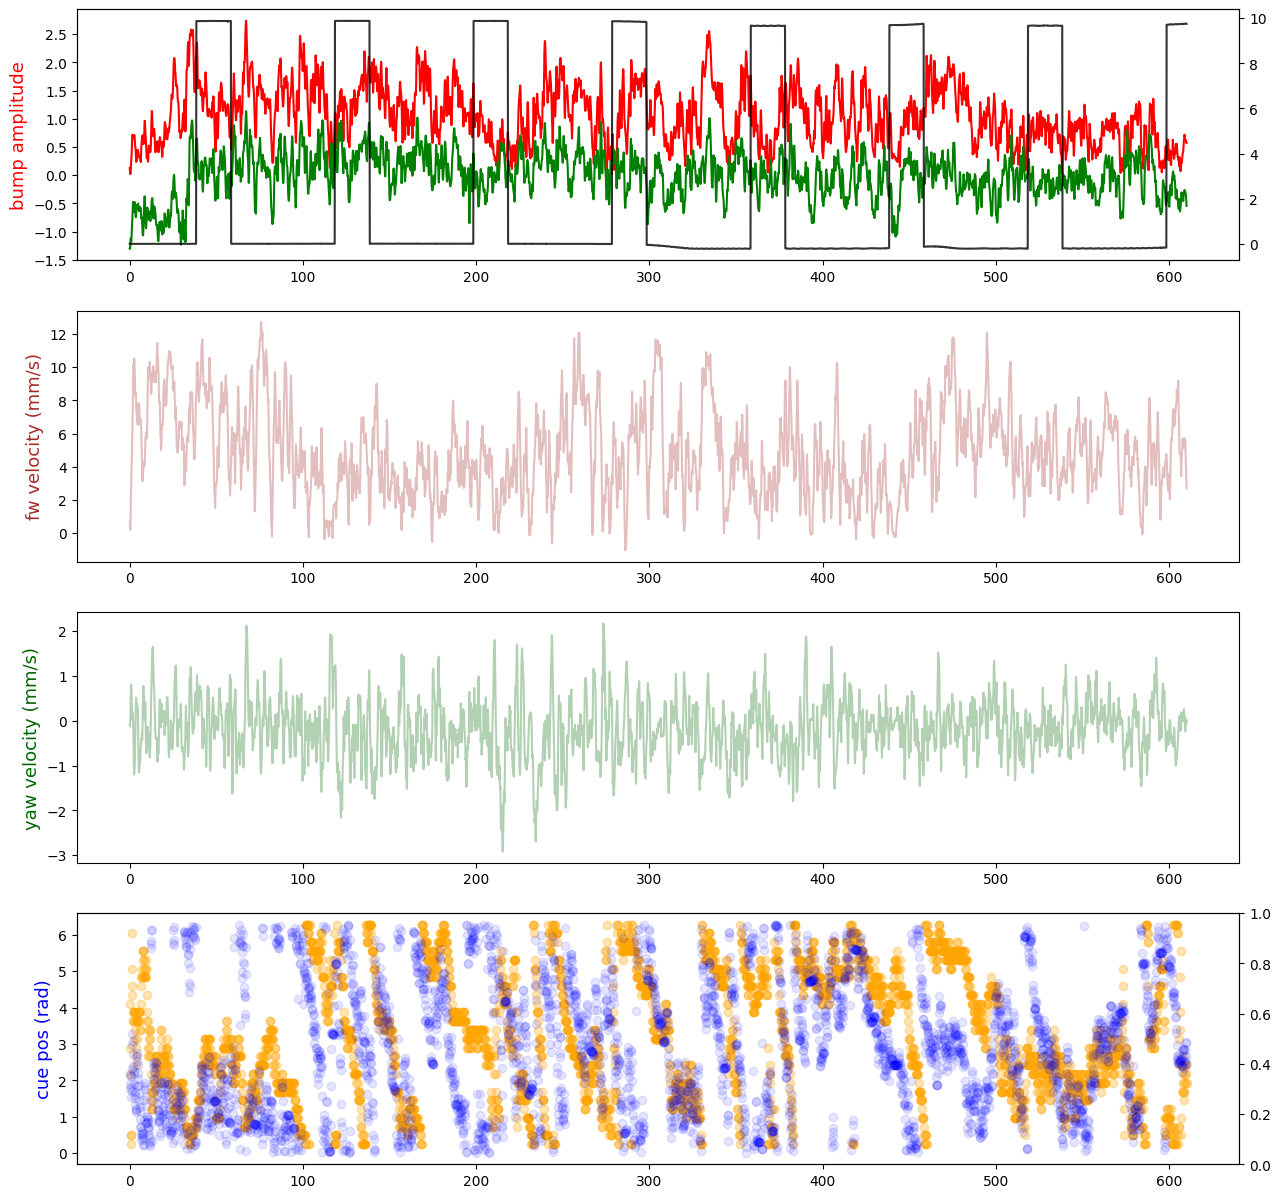

In [36]:
fig_ex, ax = plt.subplots(4,1,figsize=[15,15])
ind1 = 0
ind2 = len(fl_df) 
ax[0].plot(fl_df.time[ind1:ind2], amp_sinfit[ind1:ind2],color = 'red')
ax[0].plot(fl_df.time[ind1:ind2], base_sinfit[ind1:ind2],color = 'green')
ax[0].set_ylabel('bump amplitude', fontsize = 13, color = 'red')
ax4 = ax[0].twinx()
ax4.plot(fl_df.time[ind1:ind2], fl_df.odor[ind1:ind2],color='black',alpha = 0.8)
#ax2 = ax[0].twinx()
#ax2.plot(fl_df.time[ind1:ind2], fl_df.mean_MBON09[ind1:ind2],color='darkgreen', alpha = 0.5)
#ax2.set_ylabel('MBON09 df/f', fontsize = 13, color = 'darkgreen')
#ax[1].plot(fl_df.time[ind1:ind2], fl_df.odor[ind1:ind2],color='brown',alpha = 0.8)
#ax[1].set_ylabel('odor delivery', fontsize = 13, color = 'brown')
#ax[3].scatter(fl_df.time[ind1:ind2], fl_df.heading[ind1:ind2],color='blue',alpha = 0.3)
ax[3].scatter(fl_df.time[ind1:ind2],2*np.pi-phase_sinfit[ind1:ind2], color = 'orange',alpha = 0.3)
ax[3].scatter(fl_df.time[ind1:ind2], fl_df.heading[ind1:ind2],color ='blue',alpha = 0.1)
#ax[3].scatter(fl_df.time[ind1:ind2], heading_intp[ind1:ind2],color ='orange',alpha = 0.3)
#ax[3].scatter(jumpbar_pd.time[:-600], 2*np.pi-jumpbar_pd.panel_heading[600:],color ='orange',alpha = 0.1)
#for i in range(len(jump_idx[0])):
   # ax[3].axvline(jumpbar_pd.time[jump_idx[0][i]],color ='red')
#ax[3].scatter(fl_df.time[ind1:ind2], 2*np.pi-heading_interp,color ='green',alpha = 0.3)
#ax[3].axvline(x = fl_df.time[int(np.ceil(bar_jump_scaled))],color = 'black')
#ax[3].axvline(x = fl_df.time[int(np.floor(bar_jump_scaled))],color = 'black')
ax[3].set_ylabel('cue pos (rad)', fontsize = 13, color = 'blue')
ax2 = ax[3].twinx()
#ax2.set_ylabel('hDeltaB bump phase (rad)', fontsize = 13, color = 'orange')
#ax[3].axvline(jumpbar_df.iloc[6198,1]-jumpbar_df.iloc[815,1],color = 'black')
#ax[3].axvline(jumpbar_df.iloc[12398,1]-jumpbar_df.iloc[815,1],color = 'black')
#ax[3].axvline(jumpbar_df.iloc[18598,1]-jumpbar_df.iloc[815,1],color = 'black')
#ax[3].axvline(jumpbar_df.iloc[24798,1]-jumpbar_df.iloc[815,1],color = 'black')
#ax[3].axvline(jumpbar_df.iloc[30998,1]-jumpbar_df.iloc[815,1],color = 'black')
#ax[3].axvline(jumpbar_df.iloc[37198,1]-jumpbar_df.iloc[815,1],color = 'black')
ax[2].plot(fl_df.time[ind1:ind2], smooth(fl_df.yawV[ind1:ind2],10),color='darkgreen',alpha = 0.3)
ax[2].set_ylabel('yaw velocity (mm/s)', fontsize = 13, color = 'darkgreen')
ax[1].plot(fl_df.time[ind1:ind2],smooth(fl_df.fwV[ind1:ind2],10), color = 'brown',alpha = 0.3)
ax[1].set_ylabel('fw velocity (mm/s)', fontsize = 13, color = 'brown')


In [37]:
# plot around odor delivery
def find_odor_start_end(fl_df):
    odor_on = fl_df[fl_df.odor > 5].index
    odor_start = [odor_on[0]]
    odor_end = []
    for i in range(len(odor_on)-1):
        if odor_on[i+1] - odor_on[i]>1:
            odor_start.append(odor_on[i+1])
            odor_end.append(odor_on[i])
    odor_end.append(odor_on[-1])
    return odor_start, odor_end



<Axes: >

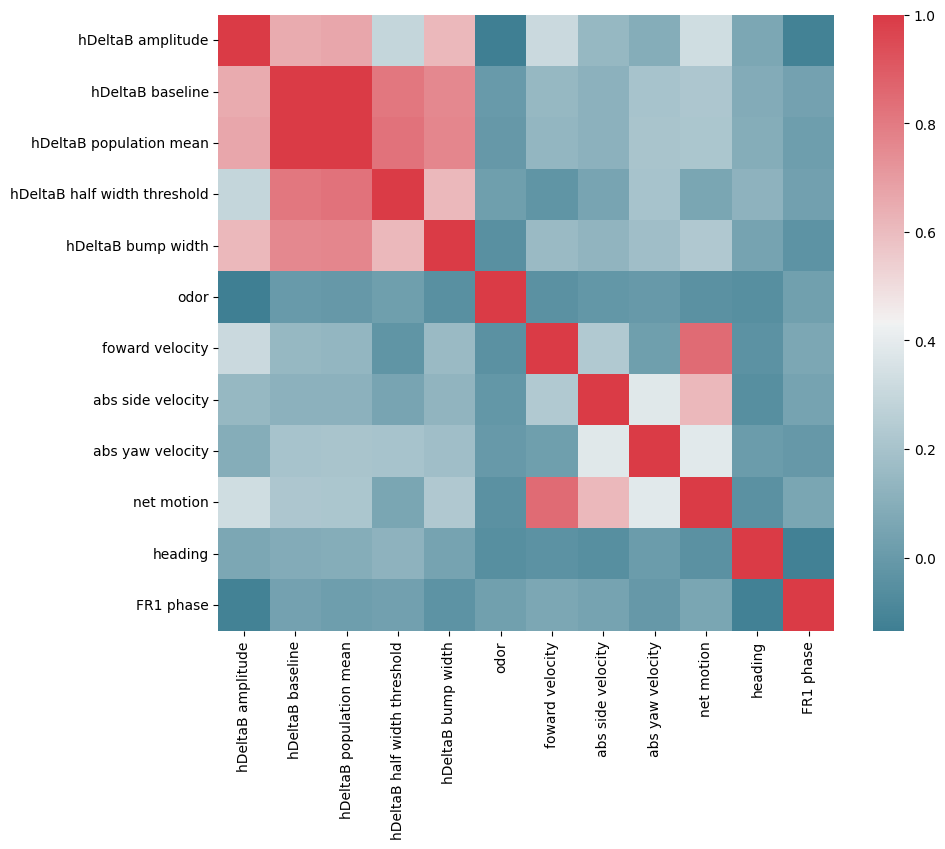

In [38]:
# nonparametrix bump parameter extraction
from scipy.stats import iqr
bump_height = iqr(df_fl_tr, axis=1)
threshold = np.percentile(df_fl_tr, 50, axis = 1)
mean_hDeltaB = np.mean(df_fl_tr, axis=1)
half_height = 0.5*np.max(df_fl_tr,axis =1)
width = np.zeros(np.shape(df_fl_tr)[0])
for i in range(len(width)):
    width[i] = np.sum(df_fl_tr[i,:]>half_height[i])/np.shape(df_fl_tr)[1]
var = ['odor','fwV', 'abssideV', 'absyawV', 'net_motion','heading']
X = amp_sinfit
X = np.vstack((X,base_sinfit))  
X = np.vstack((X,mean_hDeltaB)) 
X = np.vstack((X,threshold)) 
X = np.vstack((X,width)) 
#X = np.vstack((X,odor_start_bi)) 
#X = np.vstack((X,odor_end_bi)) 
for i in range(len(var)):
    X = np.vstack((X,fl_df[var[i]]))
X = np.vstack((X,phase_sinfit))
#X = np.vstack((X,phase_sinfit)) 

df_plot = pd.DataFrame(data = X.T, columns = ['hDeltaB amplitude','hDeltaB baseline','hDeltaB population mean','hDeltaB half width threshold','hDeltaB bump width','odor','foward velocity', 'abs side velocity', 'abs yaw velocity', 'net motion','heading','FR1 phase'])

f, ax = plt.subplots(figsize=(10, 8))
corr = df_plot.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [39]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

<Axes: >

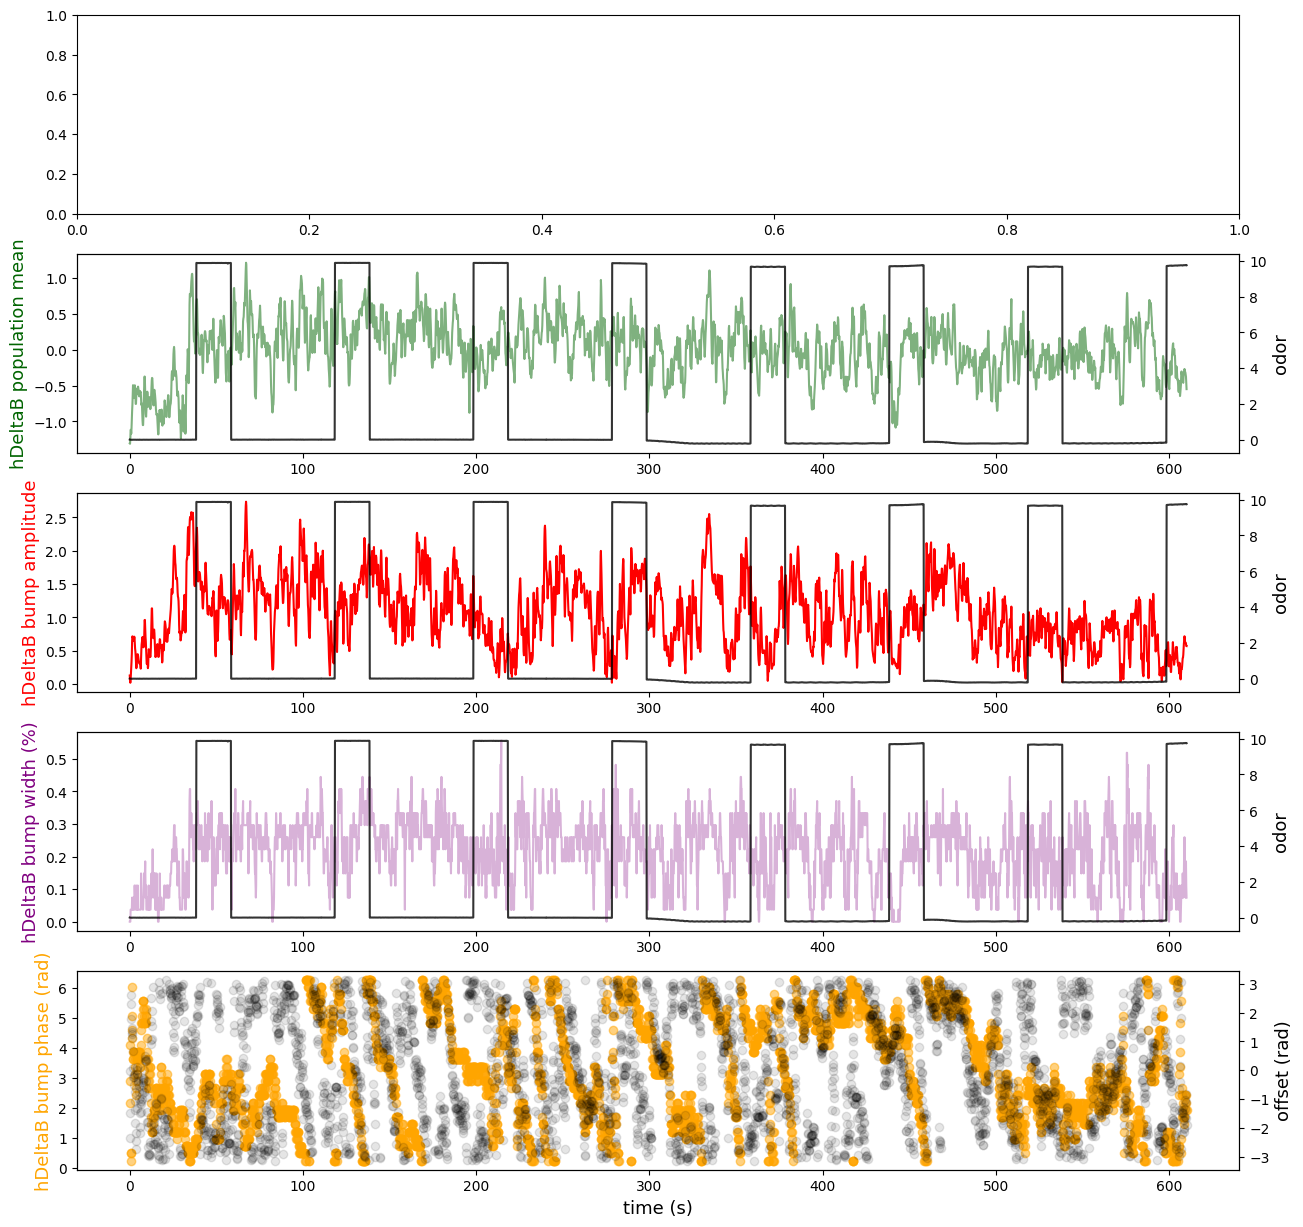

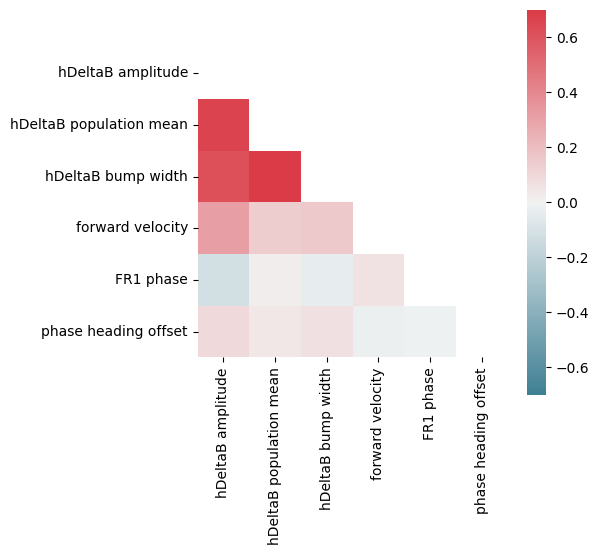

In [40]:
fig_ex, ax = plt.subplots(5,1,figsize=[15,15])
ind1 = 0
ind2 = len(fl_df) 
#ax[0].plot(fl_df.time[ind1:ind2], fl_df.mean_CRE[ind1:ind2],color = 'orangered')
#ax[0].plot(fl_df.time[ind1:ind2], fl_df.MBON09R[ind1:ind2],color = 'red')
#ax3 = ax[0].twinx()
#ax3.plot(fl_df.time[ind1:ind2], fl_df.odor[ind1:ind2],color='black',alpha = 0.8)
#ax3.set_ylabel('odor', fontsize = 13, color = 'black')
#ax[0].set_ylabel('mean FR1 CRE', fontsize = 13, color = 'orangered')
ax[2].plot(fl_df.time[ind1:ind2], amp_sinfit[ind1:ind2],color = 'red')
#ax[1].plot(fl_df.time[ind1:ind2], base_sinfit[ind1:ind2],color = 'green')
ax[2].set_ylabel('hDeltaB bump amplitude', fontsize = 13, color = 'red')
ax4 = ax[2].twinx()
ax4.plot(fl_df.time[ind1:ind2], fl_df.odor[ind1:ind2],color='black',alpha = 0.8)
ax4.set_ylabel('odor', fontsize = 13, color = 'black')
ax[1].plot(fl_df.time[ind1:ind2],mean_hDeltaB[ind1:ind2], color = 'darkgreen',alpha = 0.5)
ax[1].set_ylabel('hDeltaB population mean', fontsize = 13, color = 'darkgreen')
ax2 = ax[1].twinx()
ax2.plot(fl_df.time[ind1:ind2], fl_df.odor[ind1:ind2],color='black',alpha = 0.8)
ax2.set_ylabel('odor', fontsize = 13, color = 'black')
ax[3].plot(fl_df.time[ind1:ind2], width[ind1:ind2],color ='purple',alpha = 0.3)
ax[3].set_ylabel('hDeltaB bump width (%)', fontsize = 13, color = 'purple')
ax6 = ax[3].twinx()
ax6.plot(fl_df.time[ind1:ind2], fl_df.odor[ind1:ind2],color='black',alpha = 0.8)
ax6.set_ylabel('odor', fontsize = 13, color = 'black')
#ax[2].scatter(fl_df.time[ind1:ind2],2*np.pi-phase_sinfit[ind1:ind2], color = 'orange',alpha = 0.3)
#ax[2].scatter(fl_df.time[ind1:ind2], fl_df.heading[ind1:ind2],color ='blue',alpha = 0.3)
ax[4].scatter(fl_df.time[ind1:ind2], 2*np.pi-phase_sinfit[ind1:ind2],color ='orange',alpha = 0.5)
ax[4].set_ylabel('hDeltaB bump phase (rad)', fontsize = 13, color = 'orange')
ax[4].set_xlabel('time (s)', fontsize = 13, color = 'black')
ax5 = ax[4].twinx()
ax5.scatter(fl_df.time[ind1:ind2], phase_dif[ind1:ind2],color ='black',alpha = 0.1)
#ax5.scatter(fl_df.time[ind1:ind2], smooth(phase_dif[ind1:ind2],10),color ='black',alpha = 0.3)
#ax[3].scatter(fl_df.time[ind1:ind2], heading_intp[ind1:ind2],color ='orange',alpha = 0.3)
#ax[3].scatter(jumpbar_pd.time[:-600], 2*np.pi-jumpbar_pd.panel_heading[600:],color ='orange',alpha = 0.1)
#for i in range(len(jump_idx[0])):
   # ax[3].axvline(jumpbar_pd.time[jump_idx[0][i]],color ='red')
#ax[3].scatter(fl_df.time[ind1:ind2], 2*np.pi-heading_interp,color ='green',alpha = 0.3)
#ax[3].axvline(x = fl_df.time[int(np.ceil(bar_jump_scaled))],color = 'black')
#ax[3].axvline(x = fl_df.time[int(np.floor(bar_jump_scaled))],color = 'black')
ax5.set_ylabel('offset (rad)', fontsize = 13, color = 'black')


X= amp_sinfit
#X = np.vstack((X,np.nan_to_num(rho_pd[1:],0)))
#X = np.vstack((X,odor_start_bi))  
#X = np.vstack((X,odor_end_bi))  
#X = np.vstack((X,switch_bi)) 
#X = np.vstack((X,amp_sinfit)) 
#X = np.vstack((X,base_sinfit))  
X = np.vstack((X,mean_hDeltaB)) 
#X = np.vstack((X,threshold)) 
X = np.vstack((X,width))
#X = np.vstack((X,width_nor)) 
X = np.vstack((X,fl_df.fwV))
X = np.vstack((X,phase_sinfit))
X = np.vstack((X,phase_dif))
#df_plot = pd.DataFrame(data = X.T, columns = ['MBON09','straightness','time_since_change','distance_since_change','motion_since_change','odor_start','odor_end','start_1','start_2','start_3','start_4','start_5','start_6','start_7','start_8','end_1','end_2','end_3','end_4','end_5','end_6','end_7','foward velocity', 'abs yaw velocity', 'net motion','heading'])
df_plot = pd.DataFrame(data = X.T, columns = ['hDeltaB amplitude','hDeltaB population mean','hDeltaB bump width','forward velocity','FR1 phase','phase heading offset'])

f, ax = plt.subplots(figsize=(5, 5))
corr = df_plot.corr()
up_tri = np.triu(corr)

sns.heatmap(corr,mask=up_tri, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-0.7, vmax=0.7,
            square=True, ax=ax)

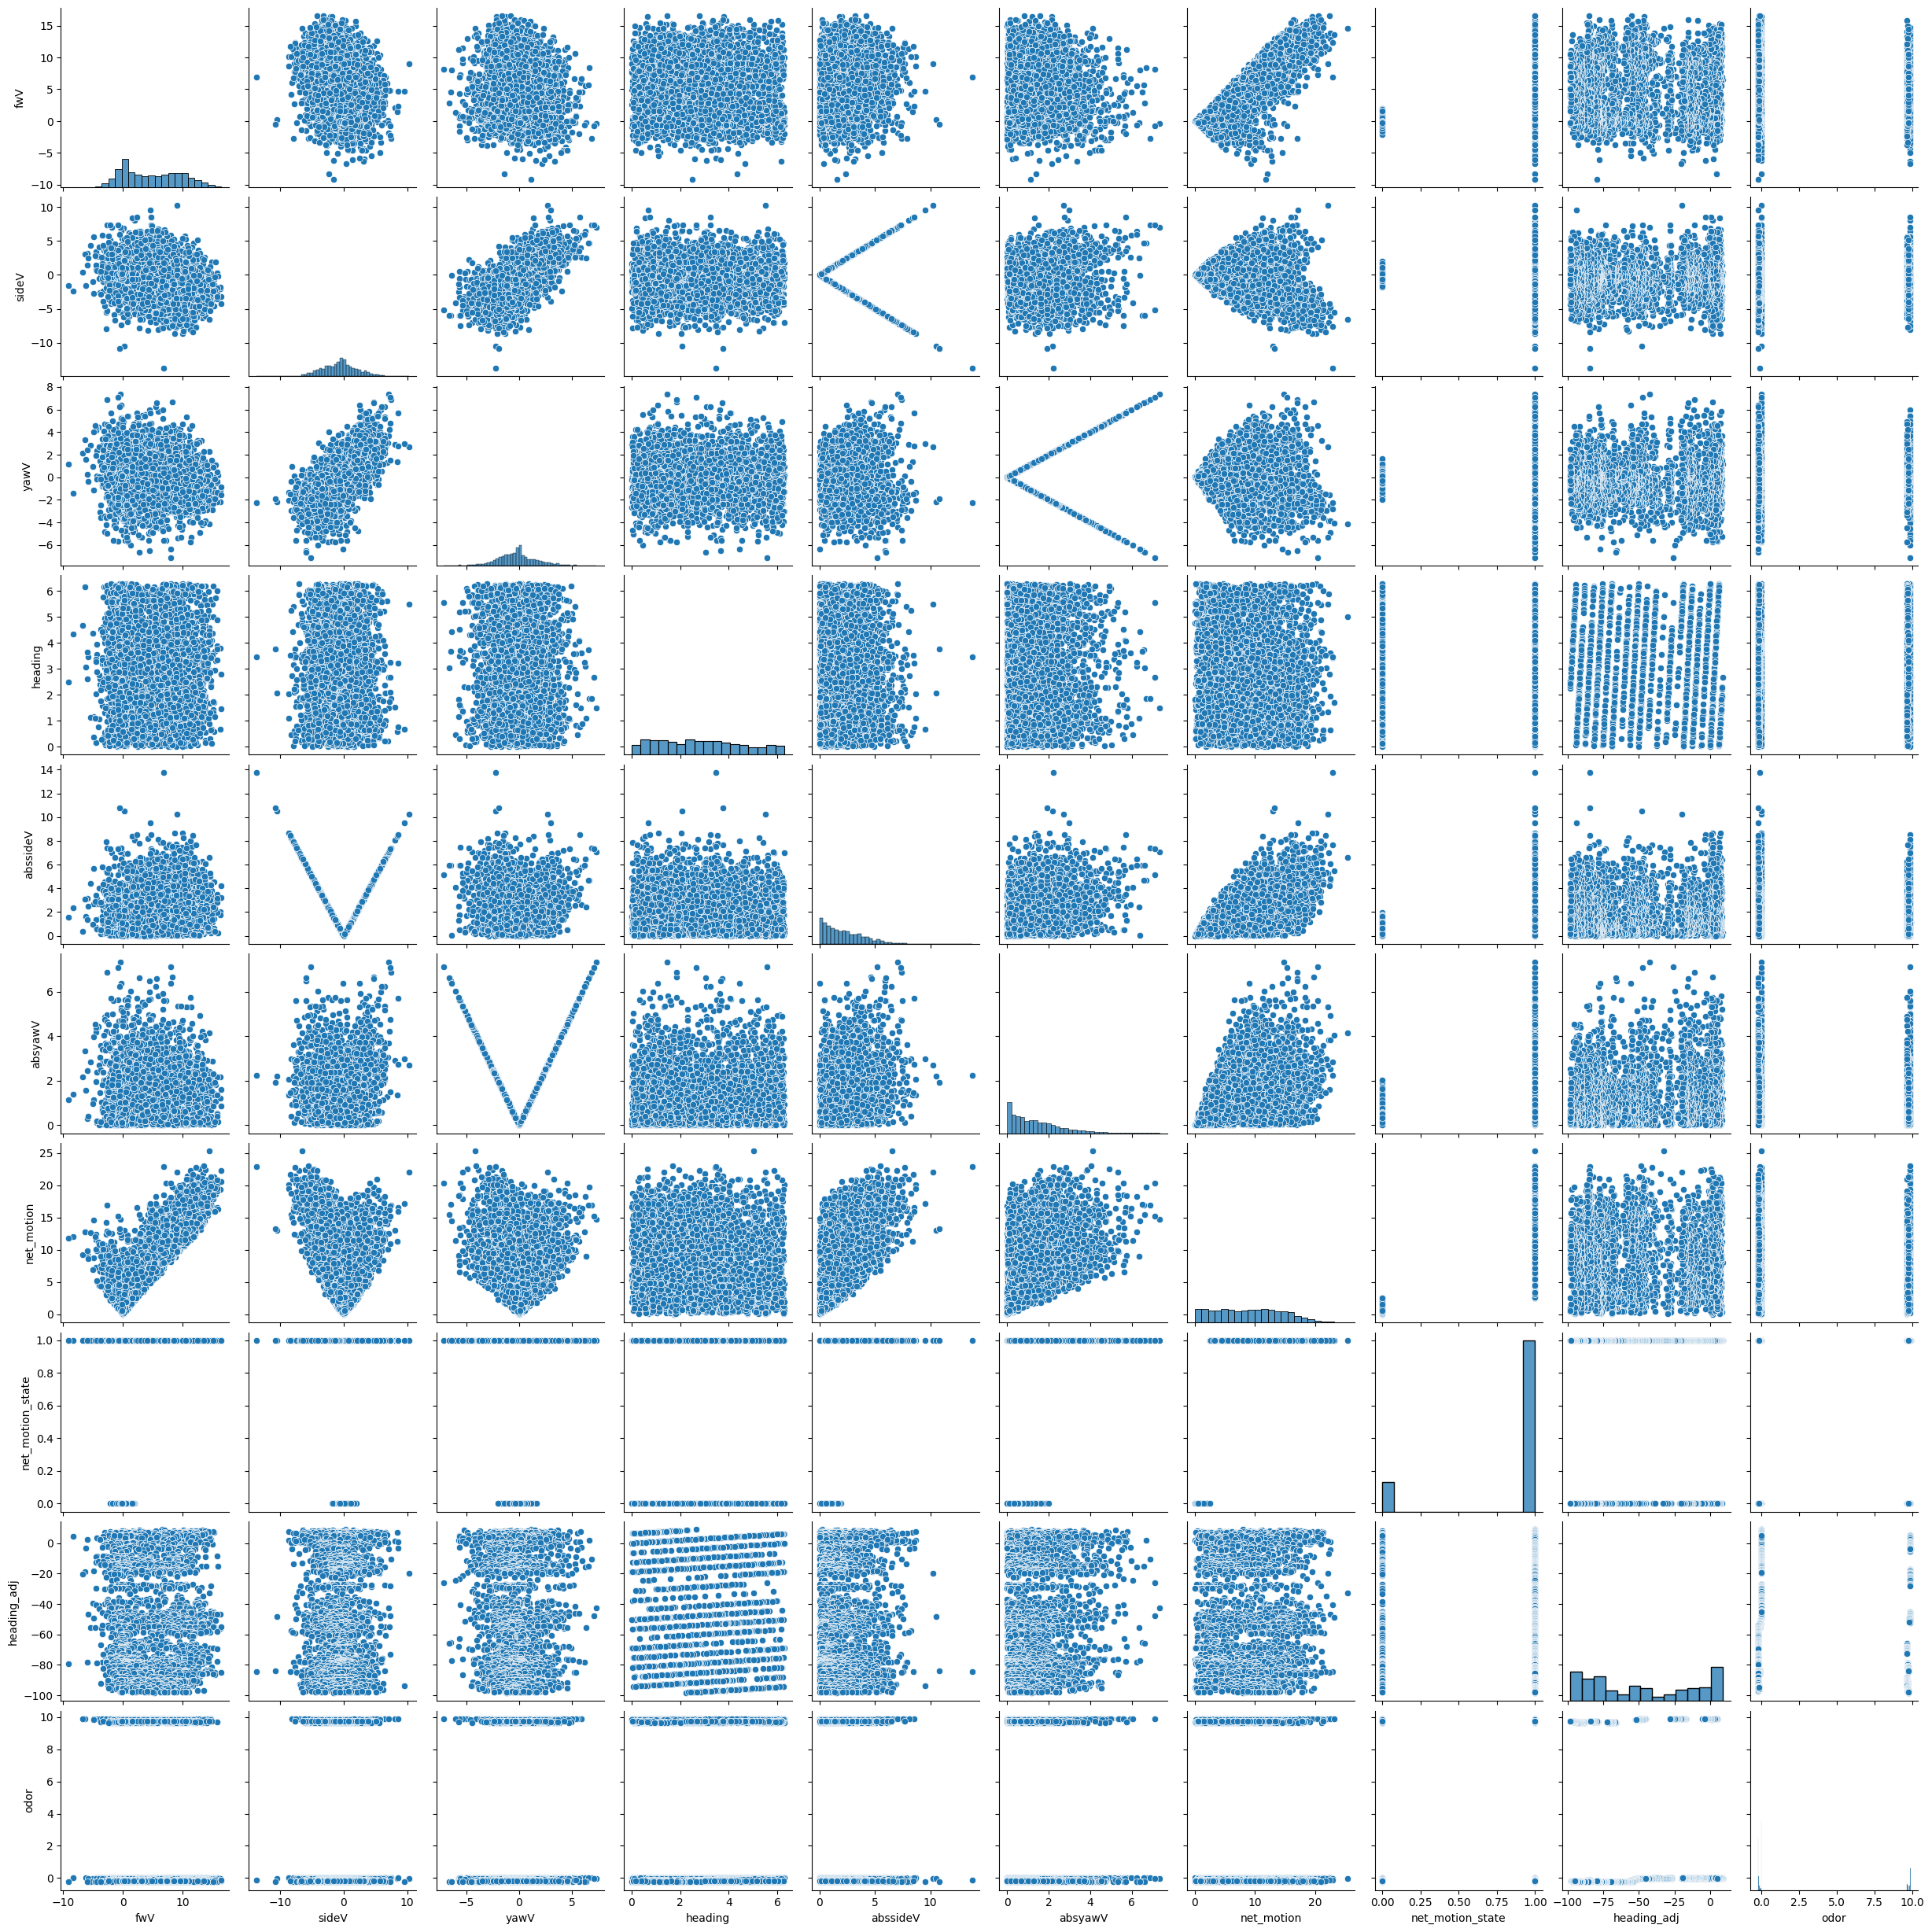

In [120]:
sns.pairplot(fl_df.iloc[:,28:])

In [41]:
# read tiff
from PIL import Image

In [42]:
def load_tif_images(tif_path):
    img = Image.open(tif_path)
    images = []
    for i in range(img.n_frames):
        img.seek(i)
        images.append(img.copy())
    return images

tif_images = load_tif_images('F:/Wilson lab/2p analysis/20231205-3_hDeltaB_tomogcamp7f_20dur_60isi/caiman/E_05_Iter_10368/20231205_3_1_2_3554_256_512_uint16__E_05_Iter_10368_output.tif')

In [53]:
np.shape(tif_images)

(3554, 256, 512)

In [87]:
def generate_plots(df, variable_name, plot_width, plot_height, window_size=50, dpi=100):
    plots = []
    for i in range(len(df)):
        # Create a figure with specified size and DPI
        fig, ax = plt.subplots(figsize=(plot_width, plot_height), dpi=dpi)
        
        # Determine the range for the moving window
        start_range = max(0, i - window_size)
        end_range = i

        # Plot the data within the moving window
        ax.plot(df[variable_name][start_range:end_range])
        ax.set_xlim(start_range, end_range)
        
        # Set other plot properties as needed
        fig.canvas.draw()

        # Convert plot to grayscale image
        img = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8)
        img = img.reshape(fig.canvas.get_width_height()[::-1] + (4,))
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY)
        plots.append(img_gray)
        plt.close(fig)
    return plots

plots = generate_plots(fl_df, 'fwV', plot_width=15, plot_height=2, window_size =50, dpi=100)

C:\Users\wilson\AppData\Local\Temp\ipykernel_17576\1450681814.py:13: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(start_range, end_range)


In [103]:
plots_odor = generate_plots(fl_df, 'odor', plot_width=15, plot_height=2, window_size =50, dpi=100)

C:\Users\wilson\AppData\Local\Temp\ipykernel_17576\1450681814.py:13: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(start_range, end_range)


In [111]:
plots_heading = generate_plots(fl_df, 'heading', plot_width=15, plot_height=2, window_size =50, dpi=100)

C:\Users\wilson\AppData\Local\Temp\ipykernel_17576\1450681814.py:13: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(start_range, end_range)


In [81]:
import cv2

In [59]:
def create_video(images, plots, output_file='output.avi'):
    height, width = images[0].size

    # Create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_file, fourcc, 20.0, (width * 2, height))

    for img, plot in zip(images, plots):
        # Combine image and plot
        combined_frame = np.vstack((np.array(img), plot))

        # Write frame to video
        out.write(combined_frame)

    out.release()

create_video(tif_images, plots)


In [60]:
from IPython.display import display, clear_output
import time

In [96]:
global_min = min([np.array(img).min() for img in tif_images])
global_max = max([np.array(img).max() for img in tif_images])

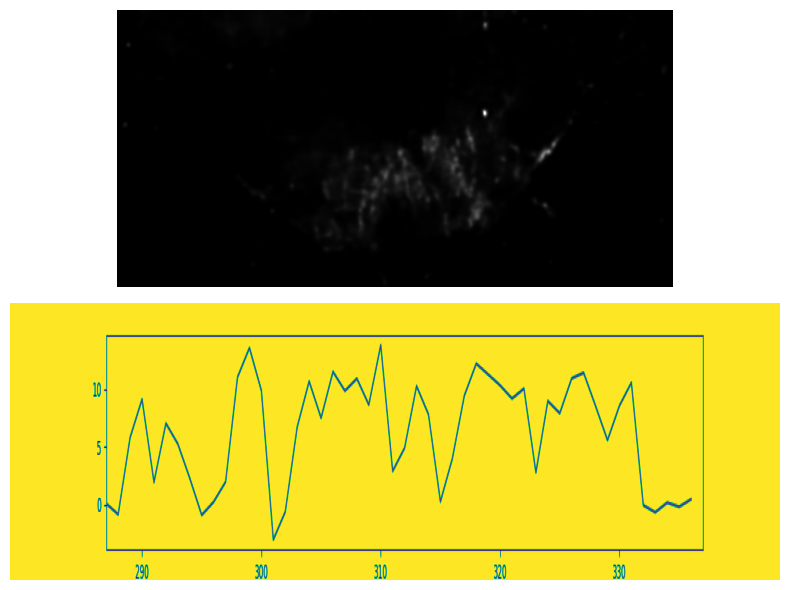

KeyboardInterrupt: 

In [113]:
for img, plot in zip(tif_images, plots):
    fig, axs = plt.subplots(2, 1, figsize=(8,6))  # Set figsize to desired dimensions
    
    # Display TIF image
    axs[0].imshow(np.array(img), cmap='gray',vmin=global_min*1.2, vmax=global_max*0.35)
    axs[0].axis('off')  # Turn off axis
    
    # Convert plot (numpy array) to PIL Image for display
    plot_img = Image.fromarray(plot)
    
    # Display plot
    axs[1].imshow(plot_img, aspect='auto')  # 'aspect' can be adjusted as needed
    axs[1].axis('off')  # Turn off axis
    
    plt.tight_layout()
    plt.show()
    
    # Pause for a short duration (e.g., 0.5 seconds)
    time.sleep(0.1)
    
    # Clear the output to display the next pair
    clear_output(wait=True)

In [110]:
for img, plot in zip(tif_images, plots_odor):
    fig, axs = plt.subplots(2, 1, figsize=(8,6))  # Set figsize to desired dimensions
    
    # Display TIF image
    axs[0].imshow(np.array(img), cmap='gray',vmin=global_min*1.2, vmax=global_max*0.35)
    axs[0].axis('off')  # Turn off axis
    
    # Convert plot (numpy array) to PIL Image for display
    plot_img = Image.fromarray(plot)
    
    # Display plot
    axs[1].imshow(plot_img, aspect='auto')  # 'aspect' can be adjusted as needed
    axs[1].axis('off')  # Turn off axis
    
    plt.tight_layout()
    plt.show()
    
    # Pause for a short duration (e.g., 0.5 seconds)
    time.sleep(0.1)
    
    # Clear the output to display the next pair
    clear_output(wait=True)

KeyboardInterrupt: 

In [114]:
for img, plot in zip(tif_images, plots_heading):
    fig, axs = plt.subplots(2, 1, figsize=(8,6))  # Set figsize to desired dimensions
    
    # Display TIF image
    axs[0].imshow(np.array(img), cmap='gray',vmin=global_min*1.2, vmax=global_max*0.35)
    axs[0].axis('off')  # Turn off axis
    
    # Convert plot (numpy array) to PIL Image for display
    plot_img = Image.fromarray(plot)
    
    # Display plot
    axs[1].imshow(plot_img, aspect='auto')  # 'aspect' can be adjusted as needed
    axs[1].axis('off')  # Turn off axis
    
    plt.tight_layout()
    plt.show()
    
    # Pause for a short duration (e.g., 0.5 seconds)
    time.sleep(0.1)
    
    # Clear the output to display the next pair
    clear_output(wait=True)

KeyboardInterrupt: 